Nama : Debrina Azzahra<br>
NIM : 211351155<br>
Kelas : Malam B<BR>
Algoritma : k-Means

# import Dataset

In [1]:
from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debrinaazzahra","key":"07023d9a2d93ce01ea362ab146b1cadc"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d harrywang/wine-dataset-for-clustering

  0% 0.00/4.36k [00:00<?, ?B/s]
100% 4.36k/4.36k [00:00<00:00, 9.45MB/s]


In [5]:
!mkdir wine-dataset-for-clustering
!unzip wine-dataset-for-clustering.zip -d wine-dataset-for-clustering
!ls wine-dataset-for-clustering

Archive:  wine-dataset-for-clustering.zip
  inflating: wine-dataset-for-clustering/wine-clustering.csv  
wine-clustering.csv


# import library yang digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Data Discovery

In [7]:
df = pd.read_csv("/content/wine-dataset-for-clustering/wine-clustering.csv")

In [8]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# EDA (minimal 5)

In [11]:
#1 nilai alkohol ter3ndah sampapi tertinggi
df.sort_values("Alcohol").head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
115,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407
113,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
94,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680
87,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562
75,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428


In [12]:
#2 nilai proline terendah sampai tertinggi
df.sort_values("Proline").head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
80,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
105,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315
111,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325


In [13]:
#3. Menampilkan berapa banyak tipe Alcohol
df["Alcohol"].value_counts()

13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: Alcohol, Length: 126, dtype: int64

In [14]:
#4. Mengurutkan banyak alkohol berdasarkan magnesium
df_sorted = df.sort_values(by=['Alcohol', 'Magnesium'], ascending=[True,False])
df_sorted.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
115,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407
113,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [15]:
#5. Menampilkan jumlah alcohol pada estimasi jumlah magnesium
pd.crosstab(df["Alcohol"],df["Magnesium"], margins=True)

Magnesium,70,78,80,81,82,84,85,86,87,88,...,126,127,128,132,134,136,139,151,162,All
Alcohol,,,,,,,,,,,,,,,,,,,,,
11.03,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11.41,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11.45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11.46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11.56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14.38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
14.39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14.75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

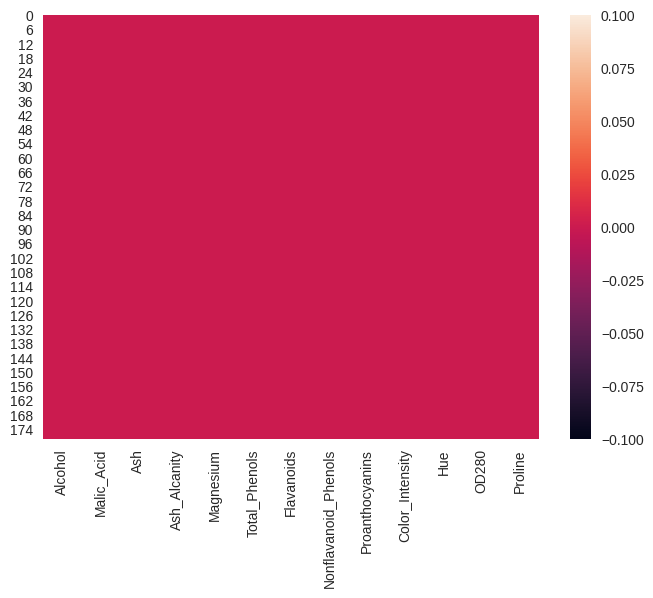

In [16]:
sns.heatmap(df.isnull())

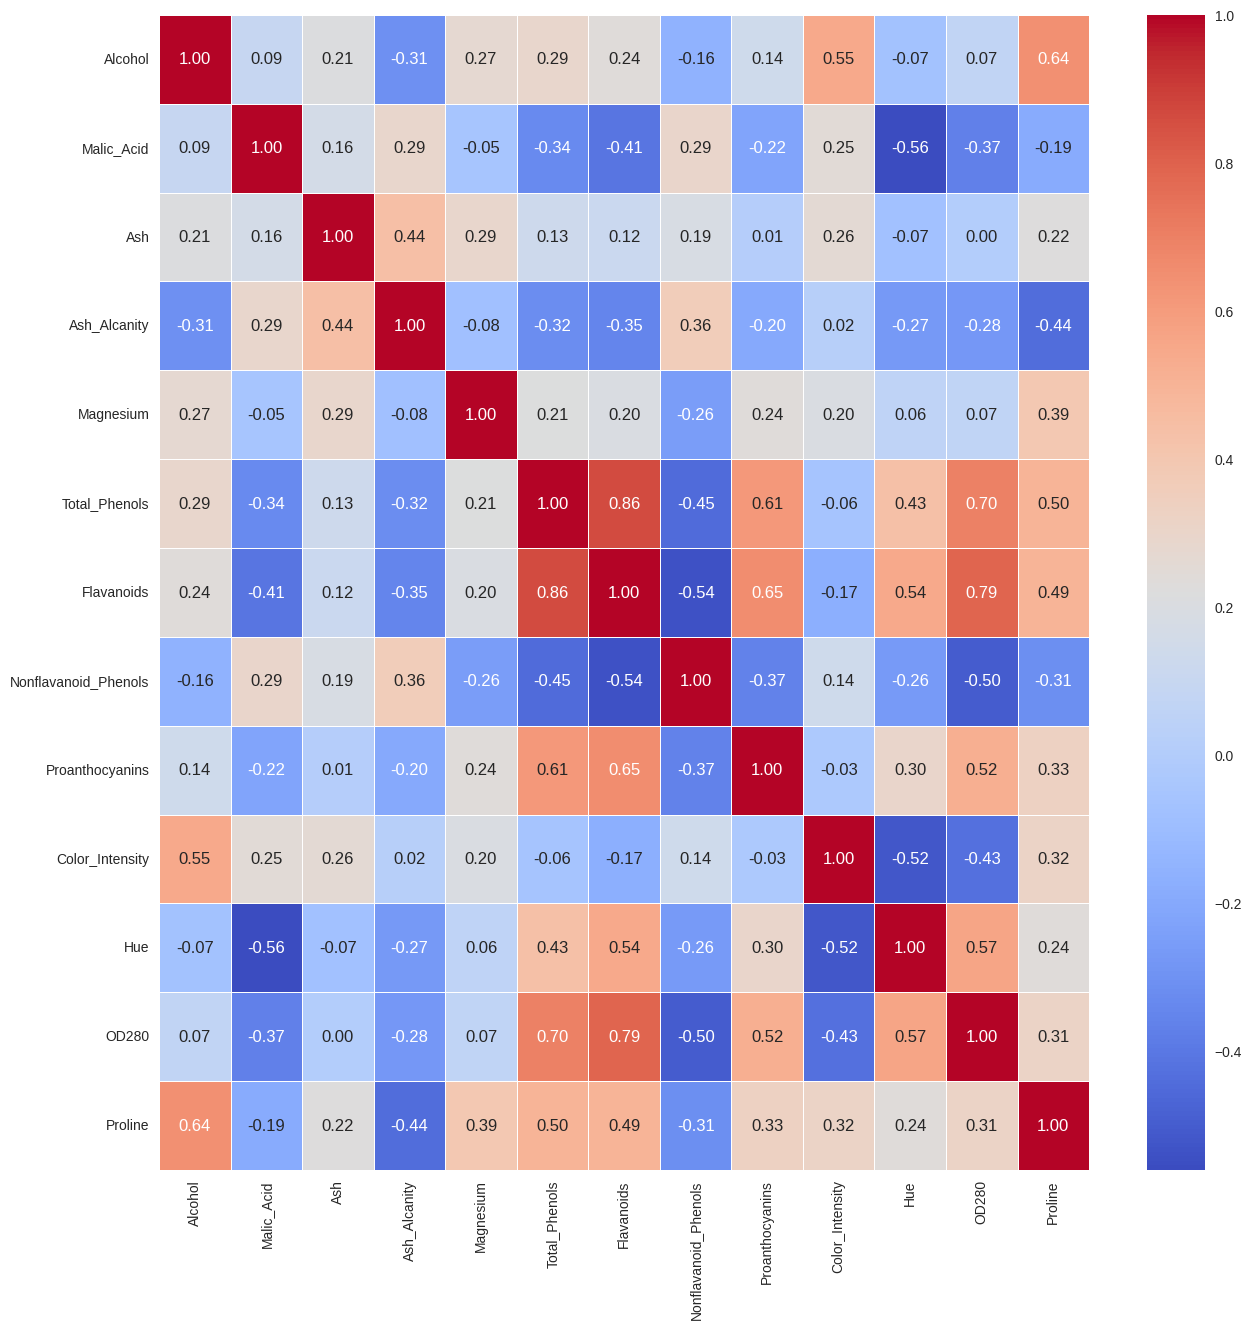

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

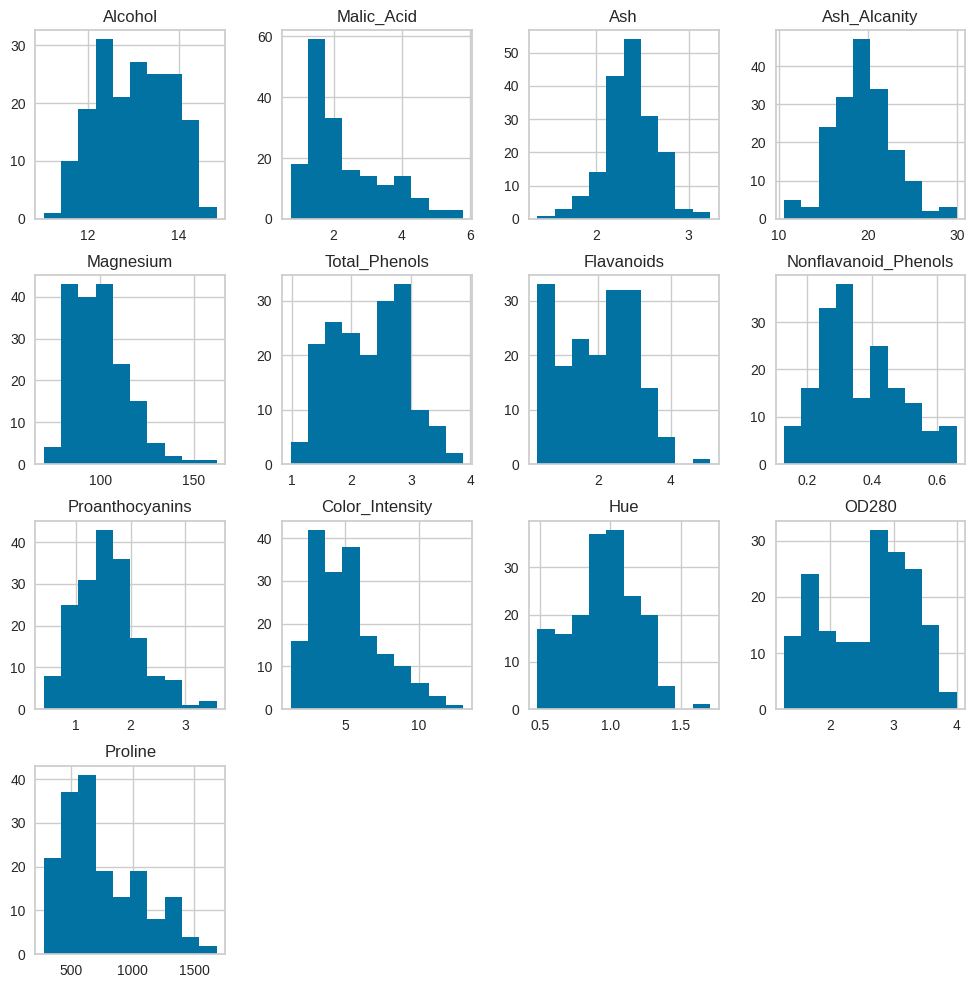

In [18]:
df.hist(figsize=(12,12));

# Preprocessing

In [19]:
features = ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity']
x = df[features]
y = df['Alcohol']
x.shape, y.shape

((178, 9), (178,))

In [20]:
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state=90)
y_test.shape

(45,)

In [21]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [22]:
X = df.drop(['Nonflavanoid_Phenols', 'Alcohol', 'Malic_Acid', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'], axis=1)

In [23]:
print(X)

      Ash  Ash_Alcanity  Magnesium
0    2.43          15.6        127
1    2.14          11.2        100
2    2.67          18.6        101
3    2.50          16.8        113
4    2.87          21.0        118
..    ...           ...        ...
173  2.45          20.5         95
174  2.48          23.0        102
175  2.26          20.0        120
176  2.37          20.0        120
177  2.74          24.5         96

[178 rows x 3 columns]


# modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

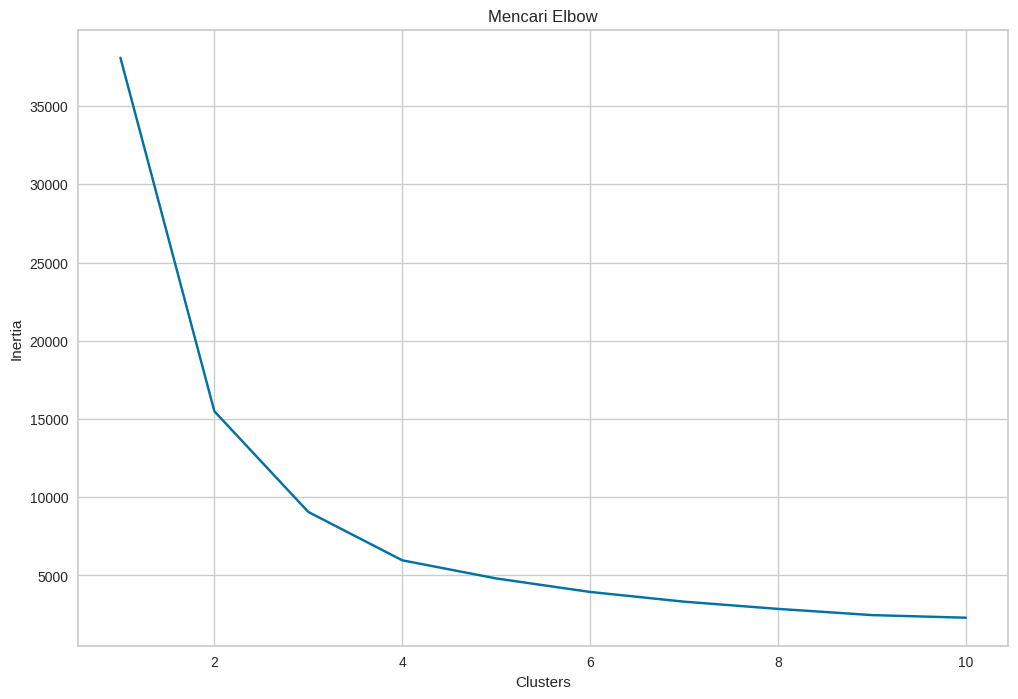

In [24]:
# Menentukan Jumlah Cluster Dengan Elbow

clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

plt.figure(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters)
plt.title('Mencari Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

plt.show()

In [25]:
sc=StandardScaler()
X_std=sc.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

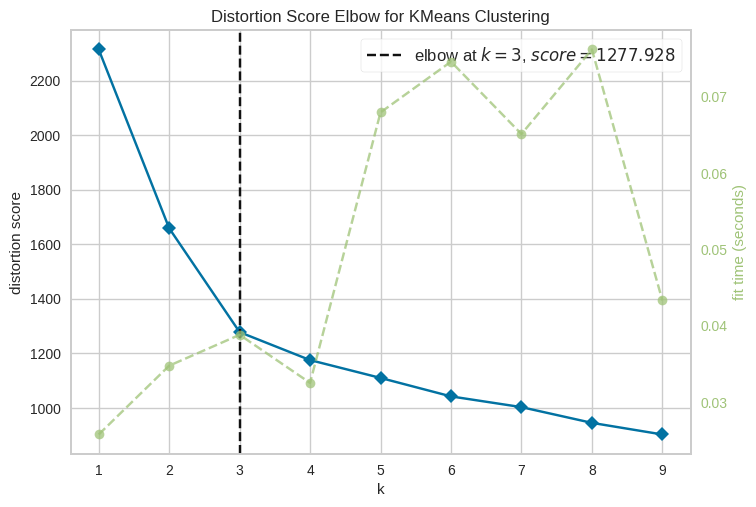

In [26]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,10))
visualizer.fit(X_std)
visualizer.poof()
plt.show()

In [27]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=15, max_iter=500, random_state=0)
    clusters = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, clusters))

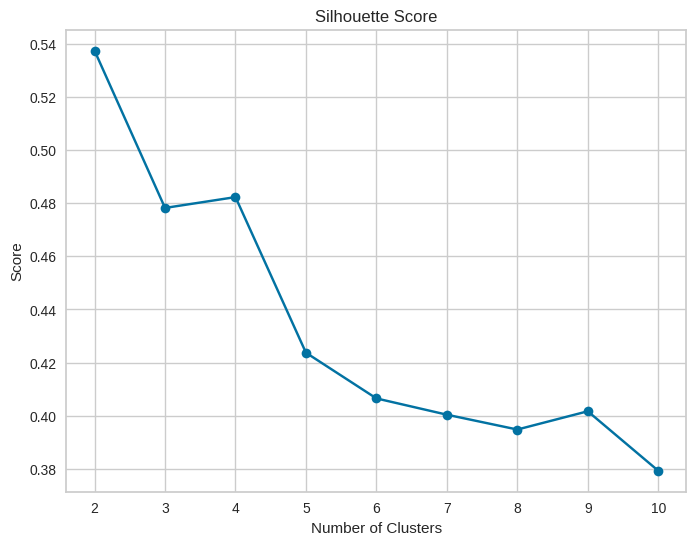

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

# Visualisasi hasil algoritma

In [29]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


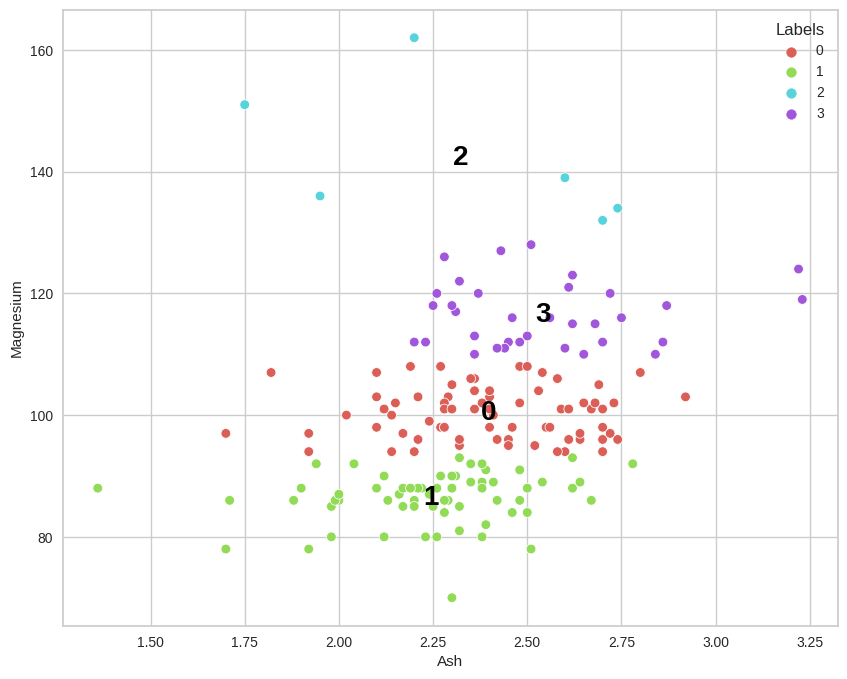

In [30]:
plt.figure(figsize=(10, 8))

# Anggap X adalah DataFrame  dan 'Labels' adalah kolom yang menunjukkan label
sns.scatterplot(x=X['Ash'], y=X['Magnesium'], hue=X['Labels'], palette=sns.color_palette('hls', n_clust))

for label in X['Labels'].unique():
    plt.annotate(label,
                 (X[X['Labels'] == label]['Ash'].mean(),
                  X[X['Labels'] == label]['Magnesium'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.show()

In [31]:
print(X)

      Ash  Ash_Alcanity  Magnesium  Labels
0    2.43          15.6        127       3
1    2.14          11.2        100       0
2    2.67          18.6        101       0
3    2.50          16.8        113       3
4    2.87          21.0        118       3
..    ...           ...        ...     ...
173  2.45          20.5         95       0
174  2.48          23.0        102       0
175  2.26          20.0        120       3
176  2.37          20.0        120       3
177  2.74          24.5         96       0

[178 rows x 4 columns]


In [32]:
X.to_excel("output_cluster.xlsx")

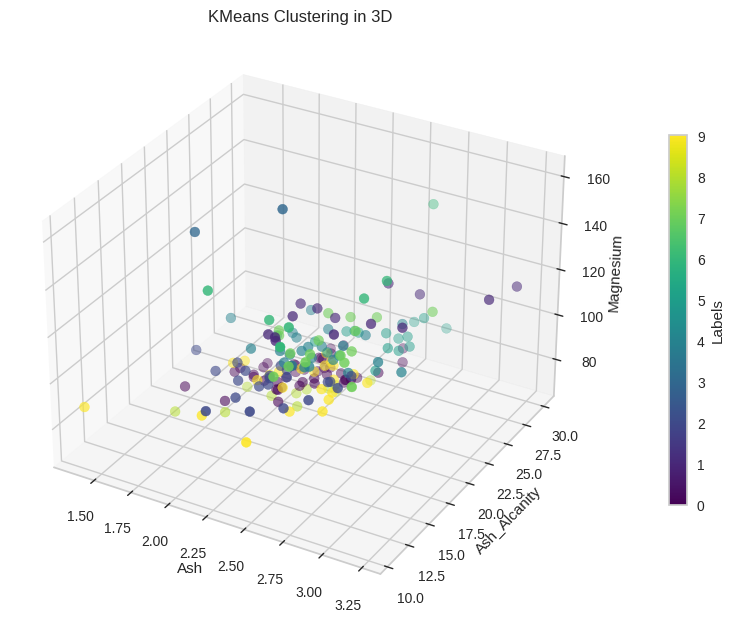

In [33]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on Labels
scatter = ax.scatter(
    df['Ash'],
    df['Ash_Alcanity'],
    df['Magnesium'],
    c=kmeans.labels_,
    cmap='viridis',
    s=50  # Marker size
)

# Customize the plot
ax.set_xlabel('Ash')
ax.set_ylabel('Ash_Alcanity')
ax.set_zlabel('Magnesium')
ax.set_title('KMeans Clustering in 3D')

# Add a colorbar
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.6)
colorbar.set_label('Labels')

# save model (pickle)

In [34]:
import pickle

filename = 'UAS_ML1_211351155_Debrina Azzahra.sav'
pickle.dump(kmeans,open(filename,'wb'))